<b>Target :</b> To improve the overall perfromance of the model by increasing number of weights, adding image augmentation and using a step LR to try to hit the target accuracy faster<br>

<b>Results :</b> The train and test accuracies are fluctuating about 98.8%<br>
  1. Best Train Accuracy : 98.87
  2. Best Test Accuracy : 99.15

<b>Analysis :</b> Increasing the weights(by +300) and image augmentation(random rotation and random affine) has not helped improve the train accuracy for some reason.And step LR doesnt seem to help much either. Couple of things I would still try to improve accuracy
1. Change the model architecture to add more weight(by adding kernels), and
2. Probably not have a second transition block and instead have only 2 convolutions after the first transition block.

# Import Libraries

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
# The first line of code loads the autoreload extension
# The second line of code sets the autoreload mode to automatically reload all modules before each execution
# Without autoreload, you would need to restart the kernel and re-import the module to see the changes
# We no longer need to restart the kernel, but we have to re-import the module. Is this the expected behaviour?
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
!pip install torchsummary

In [13]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataloader Arguments & Test/Train Dataloaders


In [14]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
  torch.cuda.manual_seed(SEED)
  device = torch.device("cuda")
  batch_size = 128
  print("Running on the GPU")
else:
  device = torch.device("cpu")
  batch_size = 64
  print("Running on the CPU")


CUDA Available? False
Running on the CPU


In [15]:
from gdrive.MyDrive.utils_1 import *

train_loader, test_loader = getDataLoader(batch_size=batch_size)

# View sample images

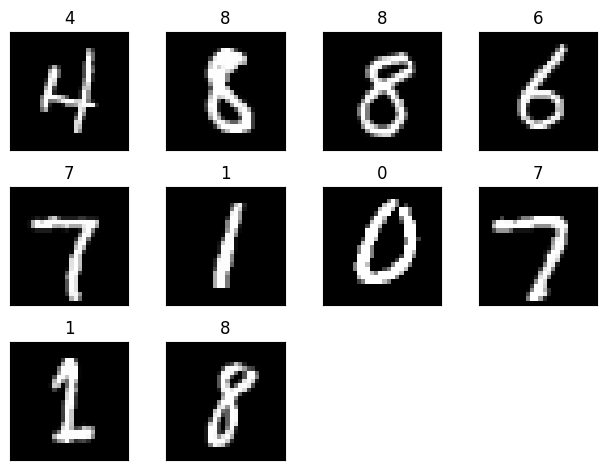

In [16]:
getSampleImages(train_loader, num_images = 10) # Need to fix this function as it can take a maximum of 12 images only

# Model Params

In [17]:
from gdrive.MyDrive.model_3 import Net # Instead of import * because Net is in a conflict with something else,

model = Net().to(device)
getModelSummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

# Training and Testing

In [18]:
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
num_epochs = 15

train_losses, test_losses, train_acc, test_acc = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion, scheduler)

Epoch 1


Train: Loss=0.0141 Batch_id=937 Accuracy=89.31: 100%|██████████| 938/938 [01:23<00:00, 11.27it/s]


Test set: Average loss: 0.0811, Accuracy: 9790/10000 (97.90%)

Epoch 2


Train: Loss=0.0505 Batch_id=937 Accuracy=97.35: 100%|██████████| 938/938 [01:23<00:00, 11.18it/s]


Test set: Average loss: 0.0750, Accuracy: 9779/10000 (97.79%)

Epoch 3


Train: Loss=0.2704 Batch_id=937 Accuracy=97.81: 100%|██████████| 938/938 [01:19<00:00, 11.75it/s]


Test set: Average loss: 0.0495, Accuracy: 9847/10000 (98.47%)

Epoch 4


Train: Loss=0.1310 Batch_id=937 Accuracy=98.10: 100%|██████████| 938/938 [01:27<00:00, 10.77it/s]


Test set: Average loss: 0.0376, Accuracy: 9885/10000 (98.85%)

Epoch 5


Train: Loss=0.0622 Batch_id=937 Accuracy=98.26: 100%|██████████| 938/938 [01:21<00:00, 11.52it/s]


Test set: Average loss: 0.0397, Accuracy: 9881/10000 (98.81%)

Epoch 6


Train: Loss=0.0285 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [01:24<00:00, 11.12it/s]


Test set: Average loss: 0.0308, Accuracy: 9907/10000 (99.07%)

Epoch 7


Train: Loss=0.0691 Batch_id=937 Accuracy=98.78: 100%|██████████| 938/938 [01:21<00:00, 11.47it/s]


Test set: Average loss: 0.0310, Accuracy: 9903/10000 (99.03%)

Epoch 8


Train: Loss=0.0804 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [01:19<00:00, 11.84it/s]


Test set: Average loss: 0.0300, Accuracy: 9909/10000 (99.09%)

Epoch 9


Train: Loss=0.0293 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [01:26<00:00, 10.86it/s]


Test set: Average loss: 0.0286, Accuracy: 9909/10000 (99.09%)

Epoch 10


Train: Loss=0.0768 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [01:19<00:00, 11.73it/s]


Test set: Average loss: 0.0299, Accuracy: 9905/10000 (99.05%)

Epoch 11


Train: Loss=0.1250 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [01:21<00:00, 11.55it/s]


Test set: Average loss: 0.0286, Accuracy: 9913/10000 (99.13%)

Epoch 12


Train: Loss=0.0179 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [01:19<00:00, 11.83it/s]


Test set: Average loss: 0.0292, Accuracy: 9907/10000 (99.07%)

Epoch 13


Train: Loss=0.0159 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [01:21<00:00, 11.53it/s]


Test set: Average loss: 0.0297, Accuracy: 9907/10000 (99.07%)

Epoch 14


Train: Loss=0.0055 Batch_id=937 Accuracy=98.86: 100%|██████████| 938/938 [01:18<00:00, 11.94it/s]


Test set: Average loss: 0.0297, Accuracy: 9907/10000 (99.07%)

Epoch 15


Train: Loss=0.0093 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [01:20<00:00, 11.62it/s]


Test set: Average loss: 0.0286, Accuracy: 9915/10000 (99.15%)



# Graphs

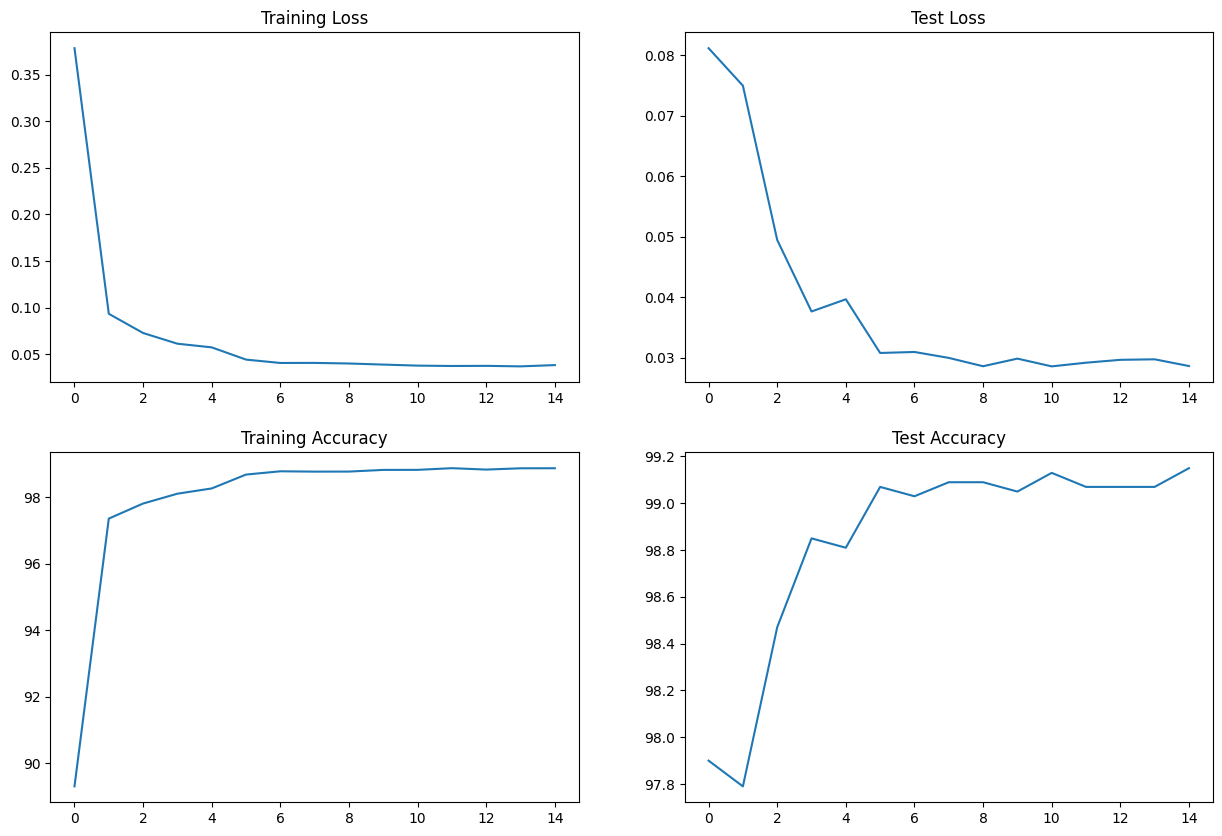

In [19]:
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)